Segmenting and Clustering Neighborhoods in Toronto


Web Scraping, Import and Clean Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import csv
print("Initial packages imported: \nNumPy, Pandas, Matplotlib, Requests, bs4.BeautifulSoup, CSV.")

Initial packages imported: 
NumPy, Pandas, Matplotlib, Requests, bs4.BeautifulSoup, CSV.


Retrieve Wikipedia web page content for Toronto metropolitan area: postal codes

In [2]:
wikipedia_link='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = (requests.get(wikipedia_link)).text

In [3]:
# Print Wikipedia page title
begin_title_tag_index = page.find("<title>")
end_title_tag_index = page.find("</title>")
start_title_index = begin_title_tag_index + 7
end_title_index = end_title_tag_index

title_string = page[int(start_title_index):int(end_title_index)]
wikipedia_page_title = title_string.strip(' - Wikipedia')
print(wikipedia_page_title)

List of postal codes of Canada: M


In [4]:
soup = BeautifulSoup(page, 'lxml')
# print(soup.prettify())

In [5]:
# Conduct data cleanup on the scraped webpage to generate the table with Canada postal codes
My_table = soup.find('body', {'class' : 'mediawiki'})
# print("My_table = \n", My_table)

My_table1 = soup.find('table', {'class' : 'wikitable sortable'})
# print("My_table1 = \n", My_table1.prettify())

# Generate the array for the webpage's HTML markup for the table rows ('tr'); print out the first 10 table rows 
rows1 = My_table1.findAll('tr')
rows1[0:8]

[<tr>
 <th>Postal Code
 </th>
 <th>Borough
 </th>
 <th>Neighbourhood
 </th></tr>,
 <tr>
 <td>M1A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>,
 <tr>
 <td>M2A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>,
 <tr>
 <td>M3A
 </td>
 <td>North York
 </td>
 <td>Parkwoods
 </td></tr>,
 <tr>
 <td>M4A
 </td>
 <td>North York
 </td>
 <td>Victoria Village
 </td></tr>,
 <tr>
 <td>M5A
 </td>
 <td>Downtown Toronto
 </td>
 <td>Regent Park, Harbourfront
 </td></tr>,
 <tr>
 <td>M6A
 </td>
 <td>North York
 </td>
 <td>Lawrence Manor, Lawrence Heights
 </td></tr>,
 <tr>
 <td>M7A
 </td>
 <td>Downtown Toronto
 </td>
 <td>Queen's Park, Ontario Provincial Government
 </td></tr>]

In [6]:
# Calculate the total number of rows in the table of Canada postal codes
len(rows1)

181

In [7]:
# Generate the array for the Canada Postal Codes Table; eliminate rows with empty values
postalCodesTable = []
for row in rows1:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    postalCodesTable.append([ele for ele in cols if ele]) 
# postalCodesTable

In [8]:
# Confirm the total number of rows in the table of Canada postal codes:
#   make sure the above data cleanup is correct, with no dropped rows
len(postalCodesTable)

181

### There are 289 rows in the table, with one header row (index [0:]); so there are 288 Toronto postal codes.
### Now generate the Pandas dataframe for: Postal Code, Borough, and Neighbourhood
### (I have preserved the British/Canadian spelling of "Neighbourhood", for reference to Canada's documentation)

In [9]:
postalCodesTable = pd.DataFrame(postalCodesTable)
postalCodesTable.columns = ['PostalCode', 'Borough', 'Neighbourhood']
postalCodesTable.head(16)

,PostalCode,Borough,Neighbourhood
0,None,None,None
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M8A,Not assigned,Not assigned
9,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"


In [10]:
postalCodesTable = postalCodesTable.drop([0])
postalCodesTable.head(16)

,PostalCode,Borough,Neighbourhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M8A,Not assigned,Not assigned
9,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
10,M1B,Scarborough,"Malvern, Rouge"


In [11]:
postalCodesTable[postalCodesTable['Borough']=='Not assigned'].count()

PostalCode       77
Borough          77
Neighbourhood    77
dtype: int64

In [12]:
postalCodesTable1 = postalCodesTable.drop(postalCodesTable[postalCodesTable['Borough'].str.contains('Not assigned')].index)
postalCodesTable1.head(16)

,PostalCode,Borough,Neighbourhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
9,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
10,M1B,Scarborough,"Malvern, Rouge"
12,M3B,North York,Don Mills
13,M4B,East York,"Parkview Hill, Woodbine Gardens"
14,M5B,Downtown Toronto,"Garden District, Ryerson"


Print the number of rows in the dataframe

In [14]:
print("Shape  of 'postalCodesTable1' is: ", postalCodesTable1.shape)

Shape  of 'postalCodesTable1' is:  (103, 3)


In [15]:
# Make a copy of postalCodesTable1 to generate postalCodesTable2, to ease with program debug
postalCodesTable2 = postalCodesTable1
print("Shape of 'postalCodesTable2' = ", postalCodesTable2.shape)

Shape of 'postalCodesTable2' =  (103, 3)


In [16]:
# In the loop below, the two pointers 'm' and 'n' point to records (rows) in the dataframe.
#  'm' will vary from 0 to 210, and 'n' will vary from 1 to 211
m=0
n=0
neigh1 = ''
neigh2 = ''
nrows2 = len(postalCodesTable2)-1

while m < nrows2 :
    n = m+1
    pcode1 = postalCodesTable2.iloc[m,0]
    pcode2 = postalCodesTable2.iloc[n,0]
    # print("\nm = ", m, ";  n = ", n)
    # print("pcode1 = ", pcode1)
    # print("pcode2 = ", pcode2)
    neigh1 = postalCodesTable2.iloc[m,2]
    neigh2 = postalCodesTable2.iloc[n,2]
    # print("neigh1 = ", neigh1)
    # print("neigh2 = ", neigh2)

    if pcode1 == pcode2:
        if neigh2 not in neigh1:
            neigh1 = neigh1 + ', ' + neigh2
        # print("Append Neighborhoods = ", neigh1)
        # print("postalCodesTable2.shape = ", postalCodesTable2.shape)
        # print("m = ", m, ";  n = ", n)
        postalCodesTable2.iloc[m,2] = neigh1
        # print("postalCodesTable2.iloc[m,2] = ", postalCodesTable2.iloc[m,2])
        postalCodesTable2 = postalCodesTable2[postalCodesTable2.Neighbourhood != 'neigh2']
        
        postalCodesTable2 = postalCodesTable2.drop(postalCodesTable2.index[n])
        nrows2 = nrows2-1
        postalCodesTable2 = postalCodesTable2.reset_index(drop=True)
        
    else:
        m = m+1


In [17]:
print("Shape of 'postalCodesTable2' is: ", postalCodesTable2.shape)

Shape of 'postalCodesTable2' is:  (103, 3)


In [18]:
postalCodesTable2.head(16)

,PostalCode,Borough,Neighbourhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
9,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
10,M1B,Scarborough,"Malvern, Rouge"
12,M3B,North York,Don Mills
13,M4B,East York,"Parkview Hill, Woodbine Gardens"
14,M5B,Downtown Toronto,"Garden District, Ryerson"


In [19]:
grouped = postalCodesTable2.groupby(['PostalCode','Borough'], as_index=False)

postalCodesTable3 = pd.DataFrame(grouped.sum())
postalCodesTable3.rename(columns={'PostalCode':'Postal Code'}, inplace = True)
postalCodesTable3.head(20)

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [22]:
print("Shape of 'postalCodesTable3' is: ", postalCodesTable3.shape)

Shape of 'postalCodesTable3' is:  (103, 3)


Retrieve GPS Coordinates for Each Postal Code

In [23]:
# Read Geospatial_data.csv as Postal Codes Latitude-Longitude reference file, convert to a Pandas dataframe
dfPostCodesLatLong = pd.read_csv('http://cocl.us/Geospatial_data')
dfPostCodesLatLong.shape

(103, 3)

In [24]:
dfPostCodesLatLong.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [25]:
postalCodesTable4 = pd.merge(postalCodesTable3, dfPostCodesLatLong, how='right', on='Postal Code')
postalCodesTable4.head(20)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [26]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(postalCodesTable4['Borough'].unique()),
        postalCodesTable4.shape[0]
    ))

The dataframe has 10 boroughs and 103 neighborhoods.


Segmenting, Clustering and Analyzing Neighbourhoods in Toronto Metro Area / North York Borough

In [27]:
# Import the relevant Python libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Library to handle JSON files 
import json 
# Note on install of geopy and folium; I have imported these already
#!conda install -c conda-forge geopy --yes 
#!conda install -c conda-forge folium=0.5.0 --yes 

# Geocoders: convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# Library to handle HTTP requests
import requests
# Pandas library to tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# Import KMeans to perform k-means clustering
from sklearn.cluster import KMeans
# Import Folium: map-generating library
import folium
print('Libraries imported.')

Libraries imported.


Focus on the North York / York Mills borough in the Toronto Metro area

In [28]:
# I retrieved the GPS coordinates of North York / York Mills, Toronto borough from a Google search
address = 'North York / York Mills, Toronto, Ontario, Canada'
latitude = 43.7501
longitude = -79.3972
print('The geographical coordinates of York Mills Borough / Toronto are {}, {}.'.format(latitude, longitude))

The geographical coordinates of York Mills Borough / Toronto are 43.7501, -79.3972.


In [29]:
# We generate the main "target borough dataset for investigation": northYork_Toronto_data
# This is the selection from the entire Pandas dataframe of all postal codes, sorted for only the borough: North York
northYork_Toronto_data = postalCodesTable4[postalCodesTable4['Borough'] == 'North York'].reset_index(drop=True)
print("Shape  of 'northYork_Toronto_data' is: ", northYork_Toronto_data.shape)

Shape  of 'northYork_Toronto_data' is:  (24, 5)


In [30]:
northYork_Toronto_data

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M2H,North York,Hillcrest Village,43.803762,-79.363452
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
2,M2K,North York,Bayview Village,43.786947,-79.385975
3,M2L,North York,"York Mills, Silver Hills",43.757490,-79.374714
4,M2M,North York,"Willowdale, Newtonbrook",43.789053,-79.408493
5,M2N,North York,"Willowdale, Willowdale East",43.770120,-79.408493
6,M2P,North York,York Mills West,43.752758,-79.400049
7,M2R,North York,"Willowdale, Willowdale West",43.782736,-79.442259
8,M3A,North York,Parkwoods,43.753259,-79.329656
9,M3B,North York,Don Mills,43.745906,-79.352188


In [31]:
# Create map of North York Borough / Toronto using latitude and longitude values
map_NorthYork_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, borough, neighbourhood in zip(northYork_Toronto_data['Latitude'], northYork_Toronto_data['Longitude'], northYork_Toronto_data['Borough'], northYork_Toronto_data['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NorthYork_Toronto)
    
map_NorthYork_Toronto

Retrieve Foursquare information on venues in the Toronto / North York borough area, analyze by neighbourhood.

In [33]:
print("Within the North York Borough / Toronto, the first neighborhood we will analyze is:")
print("   ", northYork_Toronto_data.loc[0, 'Neighbourhood'])

neighbourhood_latitude = northYork_Toronto_data.loc[0, 'Latitude']    # neighbourhood latitude
neighbourhood_longitude = northYork_Toronto_data.loc[0, 'Longitude']  # neighbourhood longitude
neighbourhood_name = northYork_Toronto_data.loc[0, 'Neighbourhood']   # neighbourhood name
print("The latitude and longitude coordinates of {} are {}, {}.".format(neighbourhood_name, 
     neighbourhood_latitude, neighbourhood_longitude))

Within the North York Borough / Toronto, the first neighborhood we will analyze is:
    Hillcrest Village
The latitude and longitude coordinates of Hillcrest Village are 43.8037622, -79.3634517.


In [34]:
# Analyze venues / local businesses within 3000 meters of the target Neighbourhood (approx. 2 mile radius)
radius = 3000
limit = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, neighbourhood_latitude, neighbourhood_longitude, radius, limit)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=0L5LJUZ1ZRIICXKIV3JEBXMSIR2A2WUKTL2PYY2UE22TX5DL&client_secret=OE2B2ZNPTMOQCWJATIXF1IBTKWIMPZT5Q3OO0PE2LBPN0UFI&v=20180605&ll=43.8037622,-79.3634517&radius=3000&limit=100'

In [35]:
results = requests.get(url).json()
# results

In [36]:
# From our Foursquare lab, we know that all the information is in the items key. 
# Define function get_category_type to retrieve the venue's category

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [37]:
# Now we clean the JSON object and structure it into a pandas dataframe.
search_query = 'venues'
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)     # flatten JSON
nearby_venues.head()

,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,venue.location.distance,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.neighborhood,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-551eda39498e4a752413a0ef-0,"[{'id': '52e81612bcbc57f1066b7a0c', 'name': 'B...",551eda39498e4a752413a0ef,175 Ravel Road,CA,Willowdale,Canada,Leslie and Finch,1422,"[175 Ravel Road (Leslie and Finch), Willowdale...","[{'label': 'display', 'lat': 43.79132587458068...",43.791326,-79.367506,NaN,M2H 1T1,ON,Chatime Willowdale,0,[],129409915
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-50023a3de4b023056dc0059e-1,"[{'id': '4bf58dd8d48988d1e6941735', 'name': 'G...",50023a3de4b023056dc0059e,25 Fairway Heights Drive,CA,Thornhill,Canada,Leslie & Steeles,1138,"[25 Fairway Heights Drive (Leslie & Steeles), ...","[{'label': 'display', 'lat': 43.80939102375782...",43.809391,-79.375285,NaN,L3T 3X1,ON,Bayview Golf & Country Club,0,[],66331416
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-50c138e4e4b0276c8687f23c-2,"[{'id': '4bf58dd8d48988d113941735', 'name': 'K...",50c138e4e4b0276c8687f23c,NaN,CA,Toronto,Canada,NaN,754,"[Toronto ON, Canada]","[{'label': 'display', 'lat': 43.79839094601139...",43.798391,-79.369187,NaN,NaN,ON,고려삼계탕 Korean Ginseng Chicken Soup & Bibimbap,0,[],NaN
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-572bb403498e1f305cd3ed0c-3,"[{'id': '4bf58dd8d48988d1df931735', 'name': 'B...",572bb403498e1f305cd3ed0c,7100 Woodbine Ave,CA,Markham,Canada,at Steeles Ave,1739,"[7100 Woodbine Ave (at Steeles Ave), Markham O...","[{'label': 'display', 'lat': 43.81566089116744...",43.815661,-79.349423,NaN,L3R 5J2,ON,Gyubee 牛兵衞燒肉工房,0,[],NaN
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4bd9842be914a593adbd56fa-4,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",4bd9842be914a593adbd56fa,3913 Don Mills Rd.,CA,Toronto,Canada,at Cliffwood Rd.,692,"[3913 Don Mills Rd. (at Cliffwood Rd.), Toront...","[{'label': 'display', 'lat': 43.80772211146167...",43.807722,-79.356798,NaN,M2H 2S7,ON,Tastee,0,[],NaN


In [38]:
# filter columns to: name, categories, latitude, longitude
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns and display header
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

,name,categories,lat,lng
0,Chatime Willowdale,Bubble Tea Shop,43.791326,-79.367506
1,Bayview Golf & Country Club,Golf Course,43.809391,-79.375285
2,고려삼계탕 Korean Ginseng Chicken Soup & Bibimbap,Korean Restaurant,43.798391,-79.369187
3,Gyubee 牛兵衞燒肉工房,BBQ Joint,43.815661,-79.349423
4,Tastee,Bakery,43.807722,-79.356798


In [39]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

91 venues were returned by Foursquare.


Explore Neighborhoods in the North York / Toronto borough

In [40]:
# Define function to get nearby venues for all neighbourhoods in northYork_Toronto_data

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, limit)
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([
            (name, lat, lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    return(nearby_venues)

In [41]:
northYork_Toronto_venues = getNearbyVenues(names=northYork_Toronto_data['Neighbourhood'],
     latitudes=northYork_Toronto_data['Latitude'],
     longitudes=northYork_Toronto_data['Longitude']
     )

Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Bedford Park, Lawrence Manor East
Lawrence Heights, Lawrence Manor
Glencairn
Downsview, North Park, Upwood Park
Humber Summit
Emery, Humberlea


In [42]:
print("Shape  of 'NorthYork_Toronto_venues' is: ", northYork_Toronto_venues.shape)

Shape  of 'NorthYork_Toronto_venues' is:  (243, 7)


In [43]:
northYork_Toronto_venues.head(10)

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hillcrest Village,43.803762,-79.363452,Eagle's Nest Golf Club,43.805455,-79.364186,Golf Course
1,Hillcrest Village,43.803762,-79.363452,New York Fries,43.803664,-79.363905,Fast Food Restaurant
2,Hillcrest Village,43.803762,-79.363452,AY Jackson Pool,43.804515,-79.366138,Pool
3,Hillcrest Village,43.803762,-79.363452,Villa Madina,43.801685,-79.363938,Mediterranean Restaurant
4,Hillcrest Village,43.803762,-79.363452,Duncan Creek Park,43.805539,-79.360695,Dog Run
5,Hillcrest Village,43.803762,-79.363452,A.Y. Jackson Secondary School Track,43.805068,-79.366677,Athletics & Sports
6,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,The LEGO Store,43.778207,-79.343483,Toy / Game Store
7,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,CF Fairview Mall,43.777548,-79.344485,Shopping Mall
8,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,SilverCity Fairview Mall Cinemas,43.778681,-79.344085,Movie Theater
9,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Hero Certified Burgers,43.777295,-79.344584,Burger Joint


Number of venues returned for each neighborhood.

In [44]:
(northYork_Toronto_venues.groupby('Neighbourhood').count())['Venue Category']
# northYork_Toronto_venues.groupby('Neighbourhood').count()

Neighbourhood
Bathurst Manor, Downsview North, Wilson Heights    19
Bayview Village                                     4
Bedford Park, Lawrence Manor East                  23
CFB Toronto, Downsview East                         3
Don Mills North                                     4
Downsview Central                                   4
Downsview Northwest                                 5
Downsview West                                      4
Downsview, North Park, Upwood Park                  4
Emery, Humberlea                                    2
Fairview, Henry Farm, Oriole                       66
Flemingdon Park, Don Mills South                   21
Glencairn                                           4
Hillcrest Village                                   6
Humber Summit                                       2
Lawrence Heights, Lawrence Manor                   15
Northwood Park, York University                     5
Parkwoods                                           4
Silver Hills, 

In [45]:
# Current northYork_Toronto_data array, as generated above
print("Length of northYork_Toronto_data before we drop 'Newtonbrook, Willowdale' is: ", len(northYork_Toronto_data))
northYork_Toronto_data.drop(index=4,axis=0,inplace=True)
print("Length of northYork_Toronto_data after we drop 'Newtonbrook, Willowdale' is:  ", len(northYork_Toronto_data))

Length of northYork_Toronto_data before we drop 'Newtonbrook, Willowdale' is:  24
Length of northYork_Toronto_data after we drop 'Newtonbrook, Willowdale' is:   23


In [46]:
northYork_Toronto_data

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M2H,North York,Hillcrest Village,43.803762,-79.363452
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
2,M2K,North York,Bayview Village,43.786947,-79.385975
3,M2L,North York,"Silver Hills, York Mills",43.757490,-79.374714
5,M2N,North York,Willowdale South,43.770120,-79.408493
6,M2P,North York,York Mills West,43.752758,-79.400049
7,M2R,North York,Willowdale West,43.782736,-79.442259
8,M3A,North York,Parkwoods,43.753259,-79.329656
9,M3B,North York,Don Mills North,43.745906,-79.352188
10,M3C,North York,"Flemingdon Park, Don Mills South",43.725900,-79.340923


In [47]:
print('There are {} unique venue categories.'.format(len(northYork_Toronto_venues['Venue Category'].unique())))

There are 108 unique venue categories.


Analyze each neighborhood

In [48]:
# One hot encoding
northYork_Toronto_onehot = pd.get_dummies(northYork_Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighbourhood column back to dataframe
northYork_Toronto_onehot['Neighbourhood'] = northYork_Toronto_venues['Neighbourhood'] 

# Move neighbourhood column to the first column
fixed_columns = [northYork_Toronto_onehot.columns[-1]] + list(northYork_Toronto_onehot.columns[:-1])
northYork_Toronto_onehot = northYork_Toronto_onehot[fixed_columns]

northYork_Toronto_onehot.head(10)

,Neighbourhood,Accessories Store,Airport,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,Beer Store,Bike Shop,Boutique,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Business Service,Butcher,Cafeteria,Café,Candy Store,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,General Entertainment,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Liquor Store,Lounge,Luggage Store,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Moving Target,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Smoothie Shop,Snack Place,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store
0,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Hillcrest Village,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,"Fairview, Henry Farm, Oriole",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,"Fairview, Henry Farm, Oriole",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,"Fairview, Henry Farm, Oriole",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,"Fairview, Henry Farm, Oriole",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
print("Shape  of 'NorthYork_Toronto_onehot' is: ", northYork_Toronto_onehot.shape)

Shape  of 'NorthYork_Toronto_onehot' is:  (243, 109)


In [50]:
# Group rows by neighbourhood, get the frequency mean of occurrence for each category.
northYork_Toronto_grouped = northYork_Toronto_onehot.groupby('Neighbourhood').mean().reset_index()
northYork_Toronto_grouped.head(10)

,Neighbourhood,Accessories Store,Airport,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,Beer Store,Bike Shop,Boutique,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Business Service,Butcher,Cafeteria,Café,Candy Store,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,General Entertainment,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Liquor Store,Lounge,Luggage Store,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Moving Target,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Smoothie Shop,Snack Place,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store
0,"Bathurst Manor, Downsview North, Wilson Heights",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.052632,0.0,0.00,0.0,0.0,0.0,0.000000,0.052632,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.00,0.00,0.0,0.105263,0.000000,0.00,0.0,0.052632,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.00,0.052632,0.052632,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.00,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.052632,0.0,0.0,0.00,0.000000,0.052632,0.052632,0.052632,0.0,0.0,0.0,0.000000,0.0,0.052632,0.0,0.052632,0.0,0.052632,0.0,0.000000,0.0,0.0,0.052632,0.0,0.052632,0.0,0.000000,0.0,0.0,0.0,0.052632,0.0,0.0,0.0
1,Bayview Village,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.250000,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.250000,0.0,0.00,0.25,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.25,0.0,0.000000,0.00,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,"Bedford Park, Lawrence Manor East",0.0,0.000000,0.043478,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.043478,0.000000,0.0,0.0,0.0,0.0,0.00,0.043478,0.0,0.043478,0.0,0.00,0.00,0.0,0.086957,0.043478,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.086957,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.043478,0.043478,0.0,0.00,0.0,0.0,0.0,0.043478,0.0,0.086957,0.00,0.0,0.043478,0.00,0.043478,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.043478,0.043478,0.0,0.0,0.0,0.043478,0.0,0.043478,0.0,0.043478,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.043478,0.0,0.043478,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,"CFB Toronto, Downsview East",0.0,0.333333,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.00,0.00,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.00,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.333333,0.000000,0.000000,0.000000,

In [51]:
print("Shape  of 'NorthYork_Toronto_grouped' is: ", northYork_Toronto_grouped.shape)

Shape  of 'NorthYork_Toronto_grouped' is:  (23, 109)


Show each neighbourhood along with its top 5 most common venues

In [52]:
num_top_venues = 5
for hood in northYork_Toronto_grouped['Neighbourhood']:
    print("--- " + hood + " ---")
    temp = northYork_Toronto_grouped[northYork_Toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

--- Bathurst Manor, Downsview North, Wilson Heights ---
              venue  freq
0       Coffee Shop  0.11
1  Sushi Restaurant  0.05
2        Restaurant  0.05
3    Sandwich Place  0.05
4     Shopping Mall  0.05


--- Bayview Village ---
                 venue  freq
0   Chinese Restaurant  0.25
1                 Café  0.25
2  Japanese Restaurant  0.25
3                 Bank  0.25
4    Accessories Store  0.00


--- Bedford Park, Lawrence Manor East ---
                  venue  freq
0    Italian Restaurant  0.09
1  Fast Food Restaurant  0.09
2           Coffee Shop  0.09
3         Grocery Store  0.04
4               Butcher  0.04


--- CFB Toronto, Downsview East ---
         venue  freq
0      Airport  0.33
1         Park  0.33
2  Snack Place  0.33
3     Pharmacy  0.00
4    Pet Store  0.00


--- Don Mills North ---
                  venue  freq
0  Gym / Fitness Center  0.25
1  Caribbean Restaurant  0.25
2                  Café  0.25
3   Japanese Restaurant  0.25
4        Massage Studio 

Create the dataframe to display the top 10 venues for each neighborhood.

In [53]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [54]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = northYork_Toronto_grouped['Neighbourhood']

for ind in np.arange(northYork_Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(northYork_Toronto_grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.head(10)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Manor, Downsview North, Wilson Heights",Coffee Shop,Fried Chicken Joint,Shopping Mall,Middle Eastern Restaurant,Frozen Yogurt Shop,Pet Store,Pharmacy,Pizza Place,Deli / Bodega,Bridal Shop
1,Bayview Village,Chinese Restaurant,Café,Bank,Japanese Restaurant,Electronics Store,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store
2,"Bedford Park, Lawrence Manor East",Fast Food Restaurant,Italian Restaurant,Coffee Shop,Greek Restaurant,Indian Restaurant,Café,Liquor Store,Butcher,Pharmacy,Pizza Place
3,"CFB Toronto, Downsview East",Snack Place,Airport,Park,Electronics Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store
4,Don Mills North,Caribbean Restaurant,Gym / Fitness Center,Café,Japanese Restaurant,Women's Store,Electronics Store,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store
5,Downsview Central,Korean Restaurant,Food Truck,Business Service,Baseball Field,Electronics Store,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store
6,Downsview Northwest,Liquor Store,Grocery Store,Gym / Fitness Center,Athletics & Sports,Discount Store,Women's Store,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop,Deli / Bodega
7,Downsview West,Moving Target,Grocery Store,Bank,Shopping Mall,Dog Run,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop,Deli / Bodega
8,"Downsview, North Park, Upwood Park",Park,Construction & Landscaping,Bakery,Massage Studio,Dog Run,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop,Deli / Bodega,Department Store
9,"Emery, Humberlea",Construction & Landscaping,Baseball Field,Women's Store,Empanada Restaurant,Comfort Food Restaurant,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant


Cluster Neighborhoods

Group the neighbourhoods into 3 clusters by K-means clustering

In [55]:
kclusters = 3

northYork_Toronto_grouped_clustering = northYork_Toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(northYork_Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 0, 1, 2, 1, 1, 1, 2])

In [56]:
northYork_Toronto_merged = northYork_Toronto_data

# Add clustering labels
northYork_Toronto_merged['Cluster Labels'] = kmeans.labels_

# Debugging code section here: confirming that all relevant dataframes have an equal number of rows ( = 23 rows ),
#  before we merge these dataframes to correspond to each result of the k-Means Clustering
#  -- this result checks out; that each dataframe has 23 rows
# northYork_Toronto_data.shape
# northYork_Toronto_merged.shape
# northYork_Toronto_grouped_clustering.shape
# kmeans.labels_.shape

# Now merge northYork_Toronto_grouped with northYork_Toronto_data, add latitude/longitude for each neighbourhood
northYork_Toronto_merged = northYork_Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
northYork_Toronto_merged

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M2H,North York,Hillcrest Village,43.803762,-79.363452,1,Golf Course,Pool,Athletics & Sports,Fast Food Restaurant,Mediterranean Restaurant,Dog Run,Women's Store,Discount Store,Comfort Food Restaurant,Construction & Landscaping
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,1,Clothing Store,Fast Food Restaurant,Coffee Shop,Bus Station,Asian Restaurant,Juice Bar,Restaurant,Jewelry Store,Japanese Restaurant,Bakery
2,M2K,North York,Bayview Village,43.786947,-79.385975,1,Chinese Restaurant,Café,Bank,Japanese Restaurant,Electronics Store,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store
3,M2L,North York,"Silver Hills, York Mills",43.757490,-79.374714,0,Park,Cafeteria,Dog Run,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop
5,M2N,North York,Willowdale South,43.770120,-79.408493,1,Ramen Restaurant,Coffee Shop,Sandwich Place,Sushi Restaurant,Restaurant,Café,Middle Eastern Restaurant,Fast Food Restaurant,Indonesian Restaurant,Japanese Restaurant
6,M2P,North York,York Mills West,43.752758,-79.400049,2,Park,Electronics Store,Bank,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop
7,M2R,North York,Willowdale West,43.782736,-79.442259,1,Pharmacy,Grocery Store,Pizza Place,Coffee Shop,Butcher,Discount Store,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop,Deli / Bodega
8,M3A,North York,Parkwoods,43.753259,-79.329656,1,Park,Pool,Food & Drink Shop,Fast Food Restaurant,Discount Store,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop
9,M3B,North York,Don Mills North,43.745906,-79.352188,1,Caribbean Restaurant,Gym / Fitness Center,Café,Japanese Restaurant,Women's Store,Electronics Store,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store
10,M3C,North York,"Flemingdon Park, Don Mills South",43.725900,-79.340923,2,Coffee Shop,Asian Restaurant,Gym,Beer Store,Bike Shop,Clothing Store,Chinese Restaurant,Dim Sum Restaurant,Discount Store,Restaurant


Generate the Folium map of clusters

In [57]:
# Visualize the remaining clusters: create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(northYork_Toronto_merged['Latitude'], northYork_Toronto_merged['Longitude'], northYork_Toronto_merged['Neighbourhood'], northYork_Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    # cluster = 1
    folium.CircleMarker([lat, lon], 
                        radius=5, 
                        popup=label, 
                        color=rainbow[cluster-1], 
                        fill=True, 
                        fill_color=rainbow[cluster-1], 
                        fill_opacity=0.7).add_to(map_clusters)
map_clusters

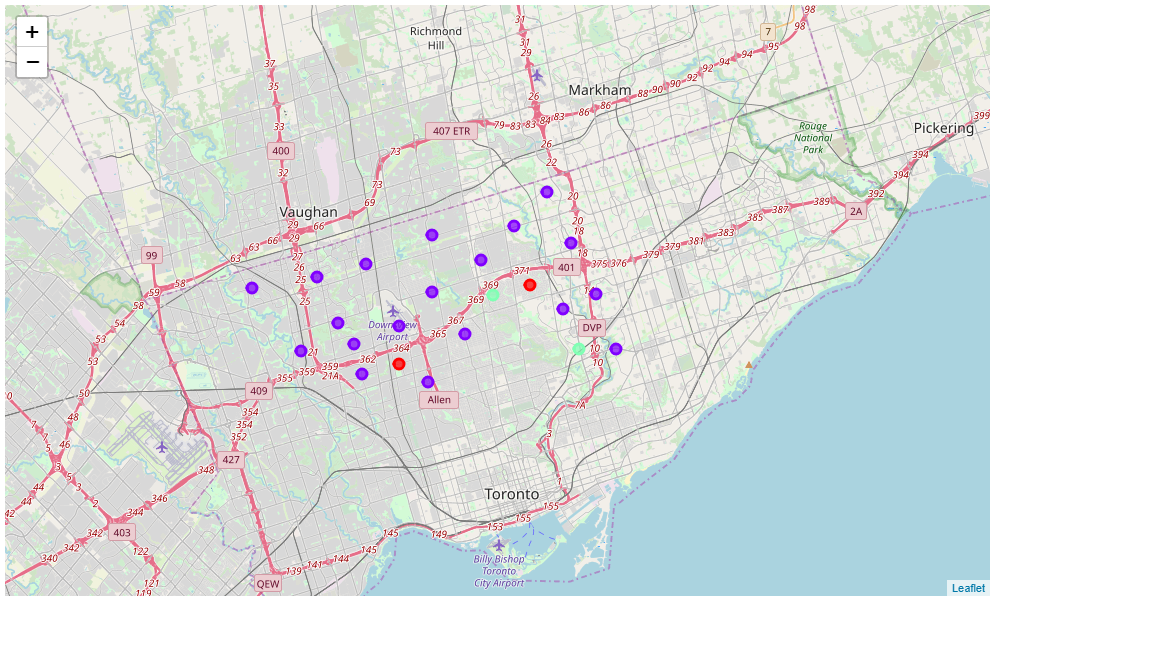

Cluster 1:

In [58]:
northYork_Toronto_merged.loc[northYork_Toronto_merged['Cluster Labels'] == 0, northYork_Toronto_merged.columns[[1] + list(range(5, northYork_Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,North York,0,Park,Cafeteria,Dog Run,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop
19,North York,0,Clothing Store,Furniture / Home Store,Women's Store,Miscellaneous Shop,Arts & Crafts Store,Boutique,Coffee Shop,Event Space,Gift Shop,Accessories Store


Cluster 2:

In [59]:
northYork_Toronto_merged.loc[northYork_Toronto_merged['Cluster Labels'] == 1, northYork_Toronto_merged.columns[[1] + list(range(5, northYork_Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,1,Golf Course,Pool,Athletics & Sports,Fast Food Restaurant,Mediterranean Restaurant,Dog Run,Women's Store,Discount Store,Comfort Food Restaurant,Construction & Landscaping
1,North York,1,Clothing Store,Fast Food Restaurant,Coffee Shop,Bus Station,Asian Restaurant,Juice Bar,Restaurant,Jewelry Store,Japanese Restaurant,Bakery
2,North York,1,Chinese Restaurant,Café,Bank,Japanese Restaurant,Electronics Store,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store
5,North York,1,Ramen Restaurant,Coffee Shop,Sandwich Place,Sushi Restaurant,Restaurant,Café,Middle Eastern Restaurant,Fast Food Restaurant,Indonesian Restaurant,Japanese Restaurant
7,North York,1,Pharmacy,Grocery Store,Pizza Place,Coffee Shop,Butcher,Discount Store,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop,Deli / Bodega
8,North York,1,Park,Pool,Food & Drink Shop,Fast Food Restaurant,Discount Store,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop
9,North York,1,Caribbean Restaurant,Gym / Fitness Center,Café,Japanese Restaurant,Women's Store,Electronics Store,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store
11,North York,1,Coffee Shop,Fried Chicken Joint,Shopping Mall,Middle Eastern Restaurant,Frozen Yogurt Shop,Pet Store,Pharmacy,Pizza Place,Deli / Bodega,Bridal Shop
12,North York,1,Coffee Shop,Furniture / Home Store,Bar,Falafel Restaurant,Massage Studio,Dog Run,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop,Deli / Bodega
13,North York,1,Snack Place,Airport,Park,Electronics Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store


Cluster 3:

In [60]:
northYork_Toronto_merged.loc[northYork_Toronto_merged['Cluster Labels'] == 2, northYork_Toronto_merged.columns[[1] + list(range(5, northYork_Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,North York,2,Park,Electronics Store,Bank,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop
10,North York,2,Coffee Shop,Asian Restaurant,Gym,Beer Store,Bike Shop,Clothing Store,Chinese Restaurant,Dim Sum Restaurant,Discount Store,Restaurant
